In [1]:
from numpy import *
from numpy.linalg import *
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

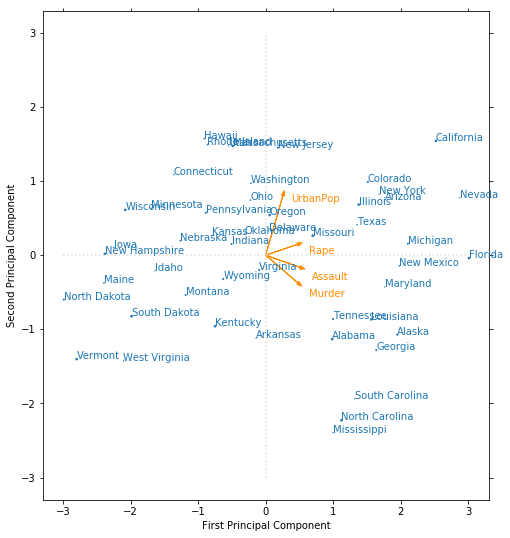

In [3]:
data = pd.read_csv('USArrests.csv')
states = array(data['Unnamed: 0'])
murder = array(data['Murder']).reshape(50,1)
murder = (murder - murder.mean())/std(murder)
assault = array(data['Assault']).reshape(50,1)
assault = (assault - assault.mean())/std(assault)
upop = array(data['UrbanPop']).reshape(50,1)
upop = (upop - upop.mean())/std(upop)
rape = array(data['Rape']).reshape(50,1)
rape = (rape - rape.mean())/std(rape)
X = column_stack((murder,assault,upop,rape))
Sigma = cov(X.T)
u,s,v= svd(Sigma)
ured = u[:,:2]
z = X.dot(ured)
z1,z2 = z[:,0], z[:,1]
plt.figure(figsize=(8,9))
plt.scatter(-z1,-z2,s=s)
mpl.rcParams['text.color'] = 'tab:blue'
for i in range(len(z1)):
    plt.text(-z1[i],-z2[i],states[i])
crimen = ['Murder','Assault','UrbanPop','Rape']
mpl.rcParams['text.color'] = 'darkorange'
for i in range(4):
    #plt.plot([0,-u[i][0]*3],[0,-u[i][1]*3],c='darkorange')
    plt.arrow(0,0,-u[i][0],-u[i][1],length_includes_head=True, head_width=.05, color = 'darkorange')
    plt.text(-u[i][0]+0.1,-u[i][1]-0.15,crimen[i]) #Estan multiplicados por 3 para que sean mas visibles y queden como la imagen. 
plt.plot(linspace(-3,3,100),zeros(100),':',c='gainsboro')
plt.plot(zeros(100),linspace(-3,3,100),':',c='gainsboro')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.tick_params(axis='both',top=True,right=True)
plt.savefig('PCA_DR.png')

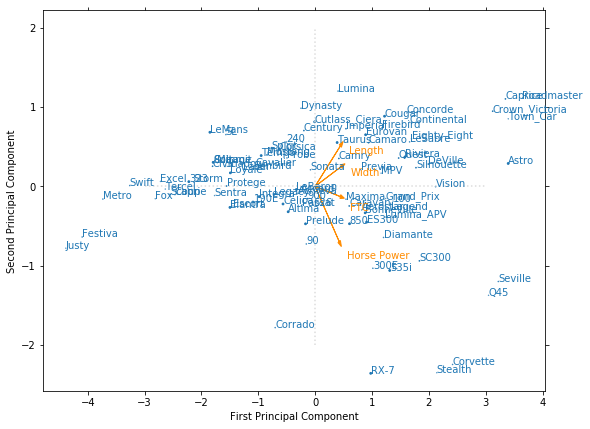

In [18]:
data = pd.read_csv('Cars93.csv')
model = array(data['Model'])
HP = array(data['Horsepower']).reshape(93,1)
HP = (HP - HP.mean())/std(HP)
length = array(data['Length']).reshape(93,1)
length = (length - length.mean())/std(length)
wi = array(data['Width']).reshape(93,1)
wi = (wi - wi.mean())/std(wi)
ftc = array(data['Fuel.tank.capacity']).reshape(93,1)
ftc = (ftc - ftc.mean())/std(ftc)
X = column_stack((HP,length,wi,ftc))
Sigma = cov(X.T)
u,s,v= svd(Sigma)
ured = u[:,:2]
z = X.dot(ured)
z1,z2 = z[:,0], z[:,1]
plt.figure(figsize=(9,7))
plt.scatter(-z1,-z2,s=s)
mpl.rcParams['text.color'] = 'tab:blue'
for i in range(len(z1)):
    plt.text(-z1[i],-z2[i],model[i])
flecha = ['Horse Power','Length','Width','FTC']
mpl.rcParams['text.color'] = 'darkorange'
for i in range(4):
    #plt.plot([0,-u[i][0]*3],[0,-u[i][1]*3],c='darkorange')
    plt.arrow(0,0,-u[i][0],-u[i][1],length_includes_head=True, head_width=.05, color = 'darkorange')
    plt.text(-u[i][0]+0.1,-u[i][1]-0.15,flecha[i]) #Estan multiplicados por 3 para que sean mas visibles y queden como la imagen. 
plt.plot(linspace(-3,3,100),zeros(100),':',c='gainsboro')
plt.plot(zeros(100),linspace(-2,2,100),':',c='gainsboro')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.tick_params(axis='both',top=True,right=True)
plt.savefig('carros.png')